# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | nishinoomote
Processing Record 5 of Set 1 | yuzhno-kurilsk
Processing Record 6 of Set 1 | kani keli
Processing Record 7 of Set 1 | green river
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | buon ma thuot
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | vanimo
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | mahina
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | ciudad camilo cienfuegos
City not found. Skipping...
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | levuka
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | bhongir
Processing Record 21 of Set 1 | walvis b

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.98,82,99,15.16,TF,1726456809
1,albany,42.6001,-73.9662,293.59,70,39,1.81,US,1726456810
2,grytviken,-54.2811,-36.5092,270.82,89,99,6.29,GS,1726456811
3,nishinoomote,30.7333,131.0000,303.46,84,40,5.66,JP,1726456812
4,yuzhno-kurilsk,44.0306,145.8556,291.45,57,1,5.71,RU,1726456813


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.98,82,99,15.16,TF,1726456809
1,albany,42.6001,-73.9662,293.59,70,39,1.81,US,1726456810
2,grytviken,-54.2811,-36.5092,270.82,89,99,6.29,GS,1726456811
3,nishinoomote,30.7333,131.0000,303.46,84,40,5.66,JP,1726456812
4,yuzhno-kurilsk,44.0306,145.8556,291.45,57,1,5.71,RU,1726456813


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

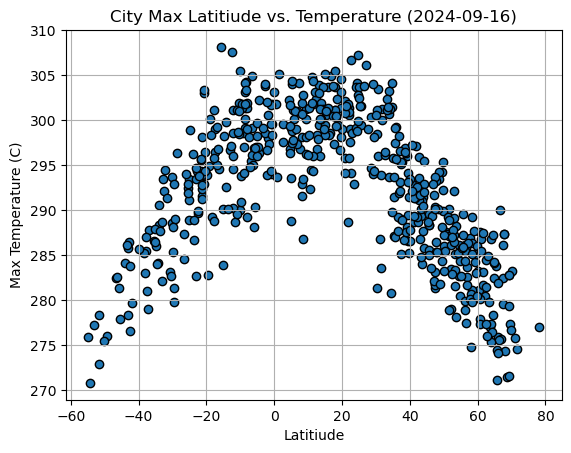

<Figure size 640x480 with 0 Axes>

In [75]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors='black')

# Incorporate the other graph properties

dt_0 = city_data_df["Date"][0]
date_0 = pd.to_datetime(dt_0, unit='s')

# Format the date to 'yyyy-mm-dd'
formatted_date = date_0.strftime('%Y-%m-%d')

plt.xlabel("Latitiude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitiude vs. Temperature (" + str(formatted_date) + ")")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

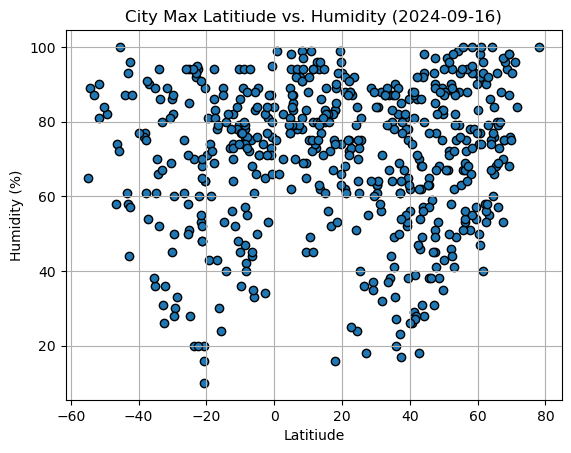

<Figure size 640x480 with 0 Axes>

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitiude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitiude vs. Humidity (" + str(formatted_date) + ")")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

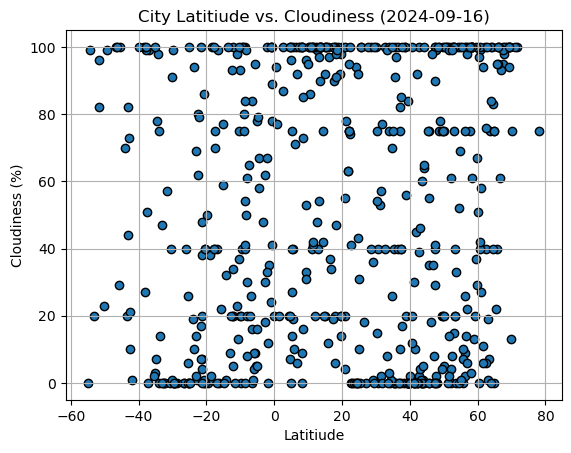

<Figure size 640x480 with 0 Axes>

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors='black')


# Incorporate the other graph properties
plt.xlabel("Latitiude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitiude vs. Cloudiness (" + str(formatted_date) + ")")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

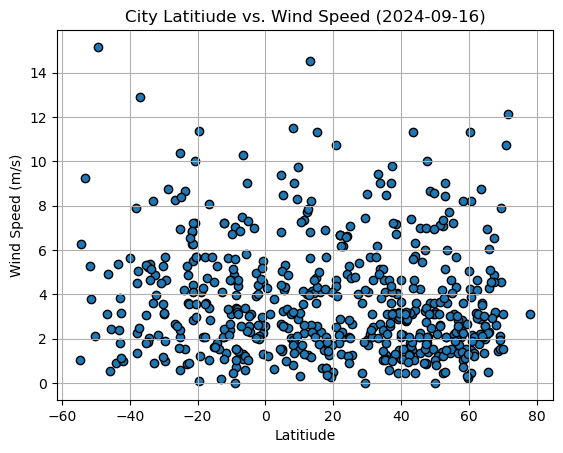

<Figure size 640x480 with 0 Axes>

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitiude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitiude vs. Wind Speed (" + str(formatted_date) + ")")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def create_linear_regression_lots(x_val, y_val, x_label, y_label, plt_title,x_cord,y_cord):
    correlation_coeff = x_val.corr(y_val)    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    print(f"The r^2-value is: {rvalue**2}")
    regression_values = slope * x_val + intercept
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regression_values, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plt_title)
    plt.annotate(line_eq, (x_cord, y_cord), color='red',fontsize='x-large')

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,293.59,70,39,1.81,US,1726456810
3,nishinoomote,30.7333,131.0000,303.46,84,40,5.66,JP,1726456812
4,yuzhno-kurilsk,44.0306,145.8556,291.45,57,1,5.71,RU,1726456813
6,green river,41.5286,-109.4662,291.47,39,10,2.81,US,1726456767
8,buon ma thuot,12.6667,108.0500,296.76,96,99,1.25,VN,1726456834


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.98,82,99,15.16,TF,1726456809
2,grytviken,-54.2811,-36.5092,270.82,89,99,6.29,GS,1726456811
5,kani keli,-12.9536,45.1033,296.74,73,9,0.18,YT,1726456815
7,waitangi,-43.9535,-176.5597,284.16,87,70,0.89,NZ,1726456833
9,namibe,-15.1961,12.1522,290.13,89,77,1.60,AO,1726456835


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6875452936841936


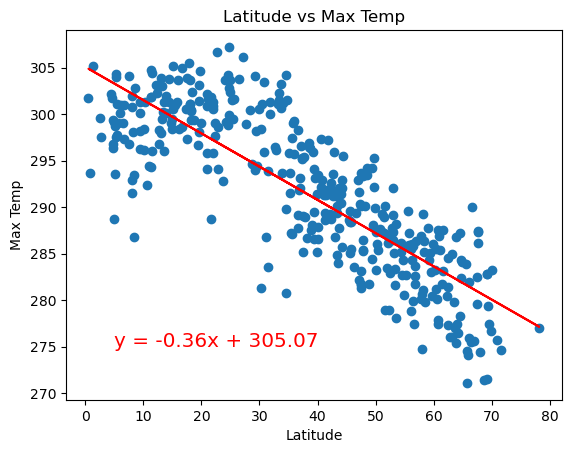

In [82]:
# Linear regression on Northern Hemisphere
plt.figure()
create_linear_regression_lots(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp","Latitude vs Max Temp",5,275)
plt.show()

The r^2-value is: 0.6531624796307399


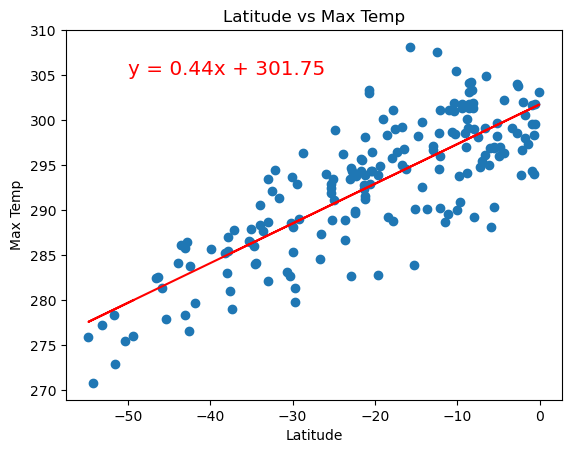

In [83]:
# Linear regression on Southern Hemisphere
plt.figure()
create_linear_regression_lots(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp","Latitude vs Max Temp",-50,305)
plt.show()

**Discussion about the linear relationship:** The relationship between Latitude and Max Temperature are opposite in northern and southern hemispheres. In the nothern hemisphere, as the latitude increases, the Maximum temperature decreases, whereas it increases in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.002628388021444613


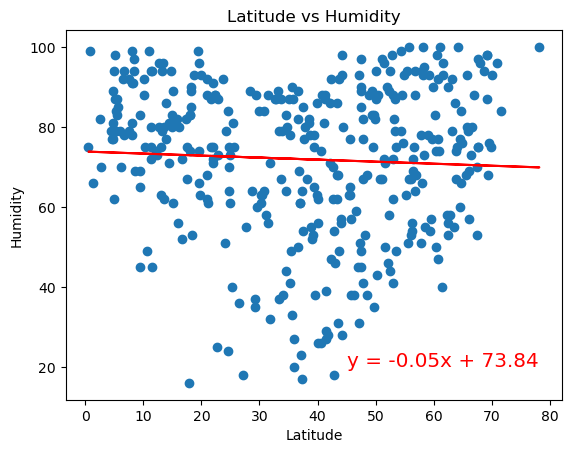

In [84]:
# Northern Hemisphere
plt.figure()
create_linear_regression_lots(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity","Latitude vs Humidity",45,20)
plt.show()

The r^2-value is: 0.00044111431868477886


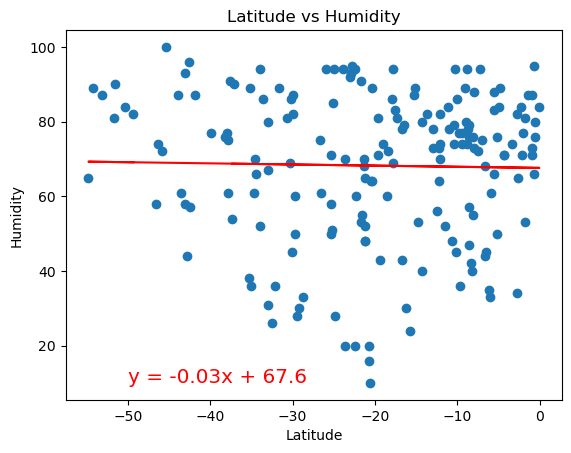

In [85]:
# Southern Hemisphere
plt.figure()
create_linear_regression_lots(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity","Latitude vs Humidity",-50,10)
plt.show()

**Discussion about the linear relationship:** There is not much of a relationship between Humidity and latitude in either of the hemispheres. The coefficient of determination,R2, value is quite small, explaining the data.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0006661474684654816


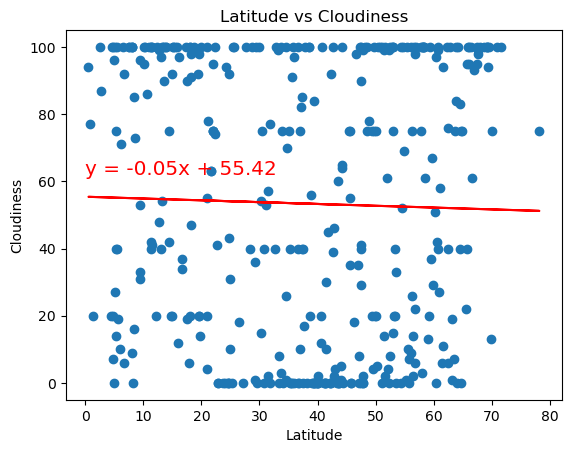

In [86]:
# Northern Hemisphere
plt.figure()
create_linear_regression_lots(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness","Latitude vs Cloudiness",0,62)
plt.show()

The r^2-value is: 0.00013277289116100824


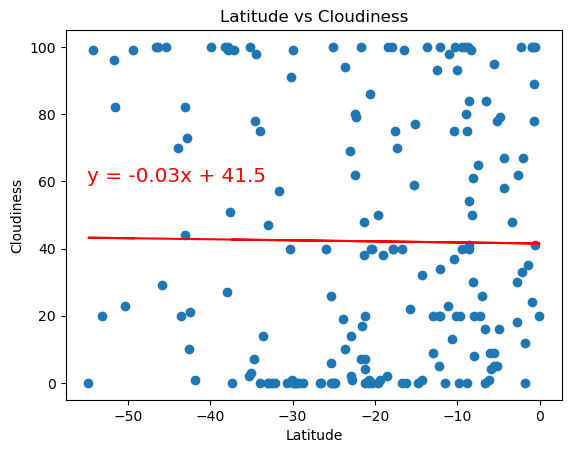

In [87]:
# Southern Hemisphere
plt.figure()
create_linear_regression_lots(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness","Latitude vs Cloudiness",-55,60)
plt.show()

**Discussion about the linear relationship:** There is no linear relationship between cloudiness and latitude in either of the hemispheres. The coefficient of determination,R2, value is quite small, explaining the spread of the data points. The level of cloudiness can not be predicted from the degree latitude. It depends on other factors.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0037408313213130157


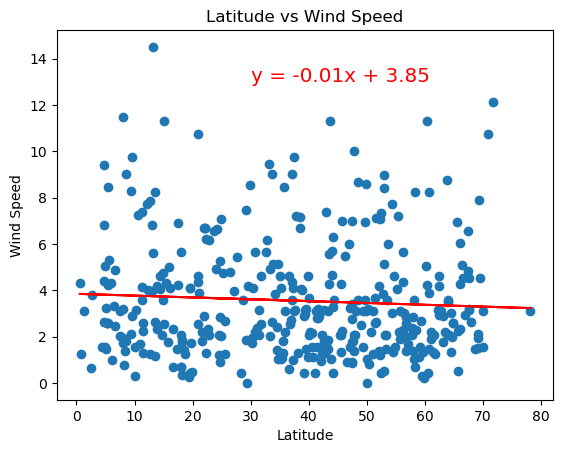

In [88]:
# Northern Hemisphere
plt.figure()
create_linear_regression_lots(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed","Latitude vs Wind Speed",30,13)
plt.show()

The r^2-value is: 0.011551435096227771


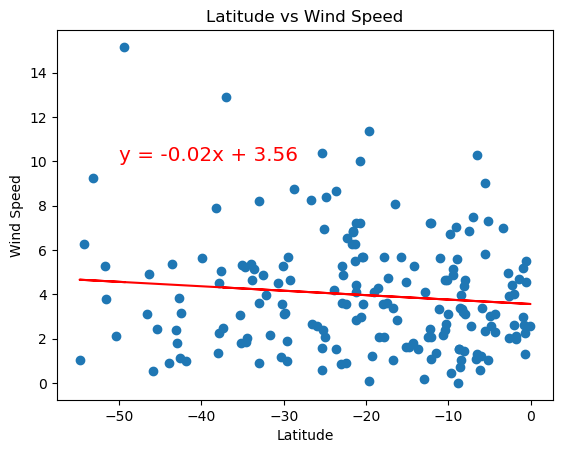

In [89]:
# Southern Hemisphere
plt.figure()
create_linear_regression_lots(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed","Latitude vs Wind Speed",-50,10)
plt.show()

**Discussion about the linear relationship:** A linear relationship between wind speed and latitude in either of the hemispheres was not observed. The coefficient of determination,R2, value is  small, explaining about 10% of the data for the southern hemisphere and 3% for the northern hemisphere. Probably more advanced models need to be tested for prediction. 